In [1]:
from matplotlib import pyplot as plt
from skimage.io import imread, imsave
import numpy as np
from skimage.draw import ellipse
import math
plt.rcParams['figure.figsize'] = (20.0, 15.0) 
plt.rcParams['image.cmap'] = 'gray'

In [2]:
M = 512 # Alto de la imágen 
N = 512 # Ancho de la imágen
C = 250 # Largo de la secuencia

l0 = 20.7 # Largo de la partícula
a0 = 9.6 # Ancho de la partícula
sigma_a = 3.8
sigma_l = 10.2

vm = 3 # Velocidad media


sigma1 = 3 # Varianza del la velocidad
sigma2 = 10 #Varianza del ángulo de la dirección
particles=500 # Número de partículas


In [6]:
#sequence() devuelve los arrrays x e y, cuyas coordenadas son particula por frame y en la entrada da la posicion en x o en y

def sequence(M=512,N=512,frames=250,mean=[10,5],cov =[[103.80124818,21.61793687],[ 21.61793687,14.59060681]],vm=3,sigma1=3,sigma2=10,particles=500,sigma_r=1):
    I = np.zeros([M,N],dtype = 'uint8')
    x = np.zeros([particles,frames])
    y = np.zeros([particles,frames])
    
    x[:,0] = np.random.uniform(-M,2*M,particles)          # Posición inicial
    y[:,0] = np.random.uniform(-N,2*N,particles)    
    d = np.random.multivariate_normal(mean,cov,particles)       # Ancho de las partículas
    a = d[:,0]
    l = d[:,1]
    print(d.shape)

    theta = np.random.uniform(0,360,particles)      # Ángulo inicial 
    v = np.random.normal(vm,10,particles)            # Velocidad inicial
    
    for f in range(frames):                       # Se crean los cuadros de a uno 
        if f>0:
            x[:,f] = x[:,f-1]+v*np.cos(np.radians(theta))
            y[:,f] = y[:,f-1]+v*np.sin(np.radians(theta))

        Iaux = I.copy()
        for p in range(particles):                   # Se agregan las partículas a la imágen de a una
            rr, cc = ellipse(x[p,f], y[p,f], l[p], a[p], I.shape,np.radians(theta[p])-math.pi/2)
            Iaux[rr,cc] = 255
                    
        Inoise = Iaux + np.random.normal(0,sigma_r,Iaux.shape) # Se agrega ruido a las imágenes

        name = 'Simulated\imagen' + str(f) + '.png'
        imsave(name,np.uint8(np.round(((Inoise-np.min(Inoise))/(np.max(Inoise)-np.min(Inoise))*255))))
        v = np.abs(np.random.normal(v,sigma1,particles))     #Próximo paso  
        
        theta = np.random.normal(theta,sigma2,particles)      

        
        
    return x,y

def velocity(x,y,M,N):
    vel = np.zeros(x.shape)
    for p in range(x.shape[0]):
        for f in range(1,x.shape[1]):
            if (x[p,f]>0 and x[p,f]<M) and (y[p,f]>0 and y[p,f]<N):
                vel[p,f] = np.sqrt((x[p,f-1]-x[p,f])**2+(y[p,f-1]-y[p,f])**2)
            else: 
                vel[p,f] = None
    return vel

def total_distance(x,y,M,N):
    dis = np.zeros(x.shape[0])
    for p in range(x.shape[0]):
        for f in range(1,x.shape[1]):
            if (x[p,f]>0 and x[p,f]<M) and (y[p,f]>0 and y[p,f]<N):
                dis[p] = dis[p] + np.sqrt((x[p,f-1]-x[p,f])**2+(y[p,f-1]-y[p,f])**2)
    return dis

def mean_velocity(vel):
    vel_m = np.zeros(vel.shape[0])
    for p in range(vel.shape[0]):
        count=0
        for f in range(vel.shape[1]):
            if vel[p,f] != None and (math.isnan(vel[p,f])==False):
                vel_m[p] = vel_m[p] + vel[p,f]
                count = count+1
        vel_m[p] = vel_m[p]/count
    return vel_m

In [7]:
mean = np.array([20.7247332,9.61818939])
cov = np.array([[103.80124818,21.61793687],
 [ 21.61793687,14.59060681]])
x,y= sequence(frames=40,sigma_r=10,particles=100,mean=mean,cov=cov)


(100, 2)


In [8]:
vel = velocity(x,y,512,512)
vel_m = mean_velocity(vel)
dis = total_distance(x,y,512,512)

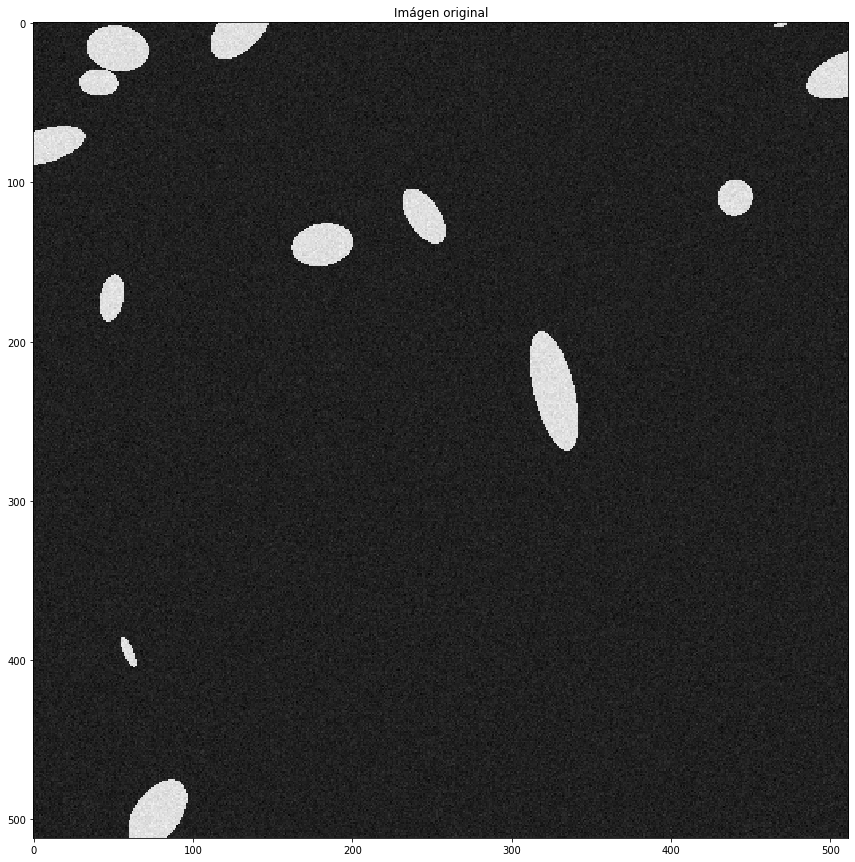

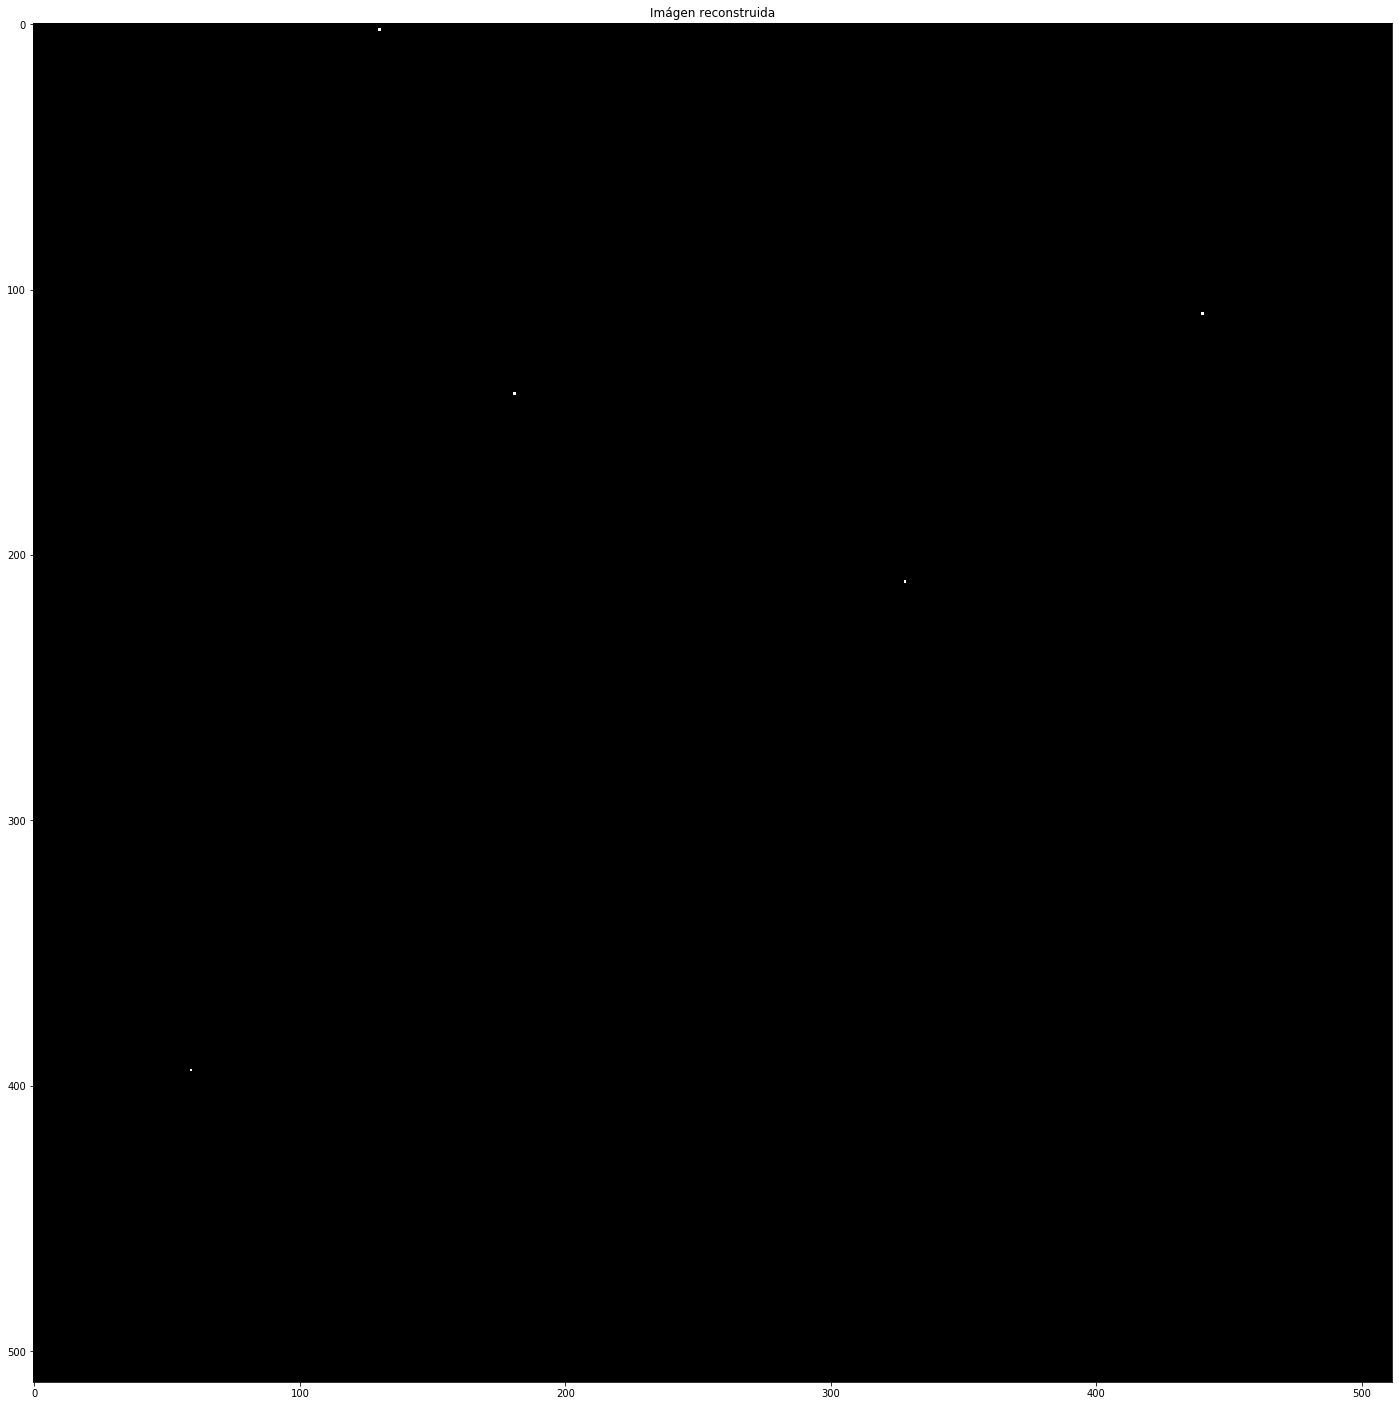

In [9]:
H = imread('Simulated\imagen0.png')
Haux=np.zeros(H.shape)
for p in range(50):                  
            if x[p,0]>0 and x[p,0]<512 and y[p,0]>0 and y[p,0]<512:
                Haux[int(x[p,0]),int(y[p,0])] = 255
plt.figure(figsize=(15,15))
plt.imshow(H)
plt.title('Imágen original')
plt.show()
plt.figure(figsize=(25,25))
plt.imshow(Haux)
plt.title('Imágen reconstruida')
plt.show()

In [33]:
np.save('x',x)
np.save('y',y)

In [34]:
print(x[0,:]*0.38)

[149.30081826 151.81661402 154.51890996 156.26537678 159.63822446
 162.51471472 165.26826611 167.84748263 171.79371326 175.22274175
 181.06881019 187.08283147 191.47501122 195.29293402 198.60703592
 201.93879467 206.91017243 211.04573946 214.92503269 217.1313277
 220.00152331 222.40876675 227.49869581 236.43395991 248.69229995
 260.1174045  269.63302125 277.66313393 286.97284486 292.13062342
 296.91298865 302.15309067 307.87804625 312.5456134  319.72775081
 328.43143327 336.36560039 343.16608277 349.36044712 357.17646853]


In [35]:
print(vel_m*0.38)

[ 5.10611707  0.          1.40463245  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          5.81009197  0.          9.19169827  0.          0.
  0.          0.          0.          0.          0.          6.04363033
  0.          0.          6.29155512  0.          0.          0.
  1.57816625  0.          2.03539553  0.          3.14261734  0.
  0.          0.          0.          0.          0.          0.
  0.          6.72226     0.         15.65157283  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          2.30903594  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          7.29555224  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         11.63522639  0.          1.30845126  0.
  7.00077136  0. 

In [18]:
y_sim = np.load('x.npy')
x_sim = np.load('y.npy')

In [19]:
print(y_sim[0,:]*0.38)

[280.81017481 283.20331329 286.12310319 289.64499692 292.0298474
 295.85749826 299.34198068 303.52434033 307.13991925 310.37481628
 312.67842848 315.74044208 318.20473295 320.411166   321.58443037
 324.03889481 328.74834217 334.12053538 339.18514732 343.63044736]
